In [1]:
def f(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
def grad(x, y):
    dx = 2 * x - 2 + 100 * (-4 * y * x + 4 * x ** 3)
    dy = 100 * (2 * y - 2 * x ** 2)
    return (dx, dy)

In [3]:
def dist(x1, x2):
    return (x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2

In [1]:
10%3

1

In [2]:
x0 = (0, 2)
gamma = 1e-3
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if dist(x_new, x_cur) < 1e-9:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
          f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

NameError: name 'grad' is not defined

In [5]:
import matplotlib.pyplot as plt
import numpy as np

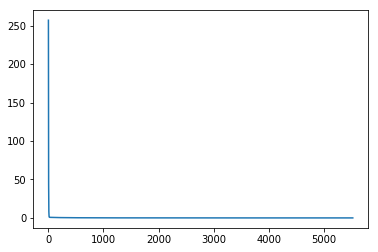

In [6]:
plt.plot(vals)

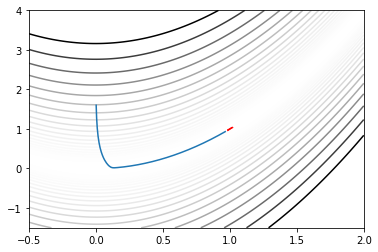

In [7]:
n = 100 # number of discretization points along the x-axis
m = 100 # number of discretization points along the x-axis
a=-0.5; b=2. # extreme points in the x-axis
c=-1.5; d=4. # extreme points in the y-axis
X,Y = np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X,Y,Z, np.logspace(-0.5, 3, 31),cmap='gray_r')
plt.plot([c[0] for c in coords], [c[1] for c in coords])
plt.scatter(1,1,c='red')



In [8]:
from scipy import optimize

In [9]:
def f_for_scipy(x):
    return f(x[0], x[1])

In [10]:
optimize.minimize(lambda x: f(*x), x0=(0, 0)) 

      fun: 2.8440316101421118e-11
 hess_inv: array([[0.49482454, 0.98957634],
       [0.98957634, 1.98394215]])
      jac: array([ 3.98673709e-06, -2.84416559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])